In [1]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
import glob

In [2]:
mpl.rcParams['font.size'] = 18
#%matplotlib notebook
#import matplotlib as mpl
import os
import sys
import math
from datetime import datetime
import time
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import seaborn as sb
import scipy
from scipy.optimize import curve_fit
#import sympy as sp
#from labellines import labelLine, labelLines
#from matplotlib.lines import Line2D

from scipy.optimize import curve_fit, leastsq
#import matplotlib.patches as patches

In [3]:
import tfs
data_frame = tfs.read('/Users/admin/Desktop/Cern_stuff/New_sim/twiss_ua9_2018_fl_no_sfx.tfs')

def read_file_trj(fname):
    columns = "NCASE IJ IONZ IONA PLA X Y Z TXX TYY TZZ WEIGHT LLOUSE ISAMPLE NEWREG NPASSAGE LTRACK ZLAST".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=1)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_flka(fname):
    columns = "XFLK YFLK ZFLK TXFLK TYFLK TZFLK PMOFLK TKEFLK".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_norm(fname):
    columns = "CSIB_X CSIBXP CSIB_Y CSIBYP CSIDSP".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_real(fname):
    columns = "XX XP YY YP PPART".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def loop_dir (basedir, pattern, fun, *args):

    pattern = basedir + '/' + pattern
    frames = []
    print (pattern)
    for i, fname in enumerate( glob.iglob(pattern) ):
        print (i,fname)

        if len(args) == 0:
            frame = fun(fname)
        elif len(args) == 1:
            frame = fun(fname, args[0])

        frame = frame.reset_index()
        frame['IFILE'] = i
        frame = frame.set_index(['IFILE','NCASE'])

        frames.append( frame )

    print("Files processed %d"%(len(frames)))
    if len(frames) == 0: return

    df = pd.concat(frames)
    print ("#", len(df))
    return df

def loop_dir_coord (basedir, pattern, fun, *args):

    pattern = basedir + '/' + pattern
    frames = []
    print (pattern)
    for i, fname in enumerate( glob.iglob(pattern) ):
        print (i,fname)

        if len(args) == 0:
            frame = fun(fname)
        elif len(args) == 1:
            frame = fun(fname, args[0])

        frame = frame.reset_index()
        frame['IFILE'] = i
        frame = frame.set_index(['IFILE',frame.index])

        frames.append( frame )

    print("Files processed %d"%(len(frames)))
    if len(frames) == 0: return

    df = pd.concat(frames)
    print ("#", len(df))
    return df

def read_file_cry(fname):
    columns = "NCASE JTRACK X Y ZSCO TXCRY TYCRY TZCRY CXTRCK CYTRCK INITX KICK PTOT DELTEN KCHNNL ISTATE NPASSAGE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0)
    
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['JTRACK'].transform('count')
    return df

def read_file_mgdrw(fname):
    columns = "NCASE JTRACK IZ IA XSCO YSCO ZSCO CXTRCK CYTRCK PTOT LTRACK NPASSAGE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0)
    
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['JTRACK'].transform('count')
    return df

def read_file_99(fname, sigma_res=0):
    columns = "NCASE ICODE ICRYST KCHNNL Z ANG0 ISTATE".split()
    #df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=1)
    
    #columns = "NCASE ICODE ICRYST KCHNNL Z ANG0 ISTATE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=1)
    
    
    #print(df)
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    #if sigma_res != 0:
     #   df['ANG0'] += np.random.normal(0, sigma_res, df.shape[0])
#         df['Y'] += np.random.normal(0, sigma_res, df.shape[0])

   # df['count'] = df.groupby(['NCASE'])['ICODE'].transform('count')
    return df
#	index	ICODE	ICRYST	KCHNNL	Z	ANG0	count

def read_file_98(fname, sigma_res=0):
    columns = "NCASE ICODE REG Z".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)
    #print(df)
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    #if sigma_res != 0:
     #   df['ANG0'] += np.random.normal(0, sigma_res, df.shape[0])
#         df['Y'] += np.random.normal(0, sigma_res, df.shape[0])

    #df['count'] = df.groupby(['NCASE'])['ICODE'].transform('count')
    return df
#	index	ICODE	ICRYST	KCHNNL	Z	ANG0	count

def read_file_96(fname, sigma_res=0):
    columns = "NCASE ICODE REG ETRACK Z".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)

    #df['count'] = df.groupby(['ICODE']).transform('count')
    return df

def read_file_86(fname, sigma_res=0):
    columns = "NCASE XX YY XP YP PLA SPAUSR(1) ISPUSR(1) LLOUSE NPASSAGE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)
    return df

def read_file_84(fname, sigma_res=0):
    columns = "NCASE IJ PLA XX YY ZZ TXX TYY WEE LLOUSE ISPUSR(1) NEWREG NPASSAGE LTRACK".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)
    return df



In [4]:
#dirname = '/Users/admin/Desktop/New_sim/TCSM_ext_geo_0110_2/run_*' 
#dirname = '/Users/admin/Desktop/New_sim/TCSM_primary_only/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TCSM_prim_and_secondary/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TCSM_prim_and_secondary_Z0/run_*'

#dirname = '/Users/admin/Desktop/New_sim/TCSM_secondary_changeTACW/run_*'

#dirname = '/Users/admin/Desktop/New_sim/TCSM_secondary_add97/run_*' #PART-THR: 250

#dirname = '/Users/admin/Desktop/New_sim/TCSM_secondary_add97_2/run_*'#PART-THR: 265

#dirname = '/Users/admin/Desktop/New_sim/TCSM_97_1210_1/run_*' #Latest

#dirname = '/Users/admin/Desktop/New_sim/TCSM_96_1310_2/run_*' #THIS ONE IS THE CORRECT FILE FOR TCSM IN, PART-THR 250



#NOW REDO SIMULATION FOR TACW/TCSM WITH PART-THR 200 GeV and do lossmaps
#dirname = '/Users/admin/Desktop/New_sim/TACW_THR200/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TACW_THR200_Z_old/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TCSM_THR200/run_*'


#dirname = '/Users/admin/Desktop/New_sim/TACW_THR200_Z_local/run_*'

#dirname = '/Users/admin/Desktop/New_sim/TCSM_THR200_Z/run_*'
dirname = '/Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_*'



#df_flk = loop_dir_coord(dirname,'lss5-double_exp001_flka_coord.dat',read_file_flka)
#df_nrm = loop_dir_coord(dirname,'lss5-double_exp001_norm_coord.dat',read_file_norm)

df_rea = loop_dir_coord(dirname,'lss5-double_exp001_real_coord.dat',read_file_real)
df_trj = loop_dir(dirname,'lss5-double_exp001_usrmed.dat',read_file_trj)

df_61 = loop_dir(dirname,'lss5-double_exp001_fort.61',read_file_mgdrw); #Exit crystal
df_60 = loop_dir(dirname,'lss5-double_exp001_fort.60',read_file_mgdrw); #Enter crystal
df_cry = loop_dir(dirname,'lss5-double_exp001_fort.51',read_file_cry);


df_99 = loop_dir(dirname,'lss5-double_exp001_fort.99',read_file_99) #NI CRY
df_98 = loop_dir(dirname,'lss5-double_exp001_fort.98',read_file_98) #NI absorber
df_96 = loop_dir(dirname,'lss5-double_exp001_fort.96',read_file_96)
df_86 = loop_dir(dirname,'lss5-double_exp001_fort.86',read_file_86)
df_84 = loop_dir(dirname,'lss5-double_exp001_fort.84',read_file_84)


#df_wht = loop_dir(dirname,'lss5-double_exp001_fort.24',read_file_mgdrw) can't read
df_40 = loop_dir(dirname,'lss5-double_exp001_fort.40',read_file_mgdrw) #Enter TCSM
df_41 = loop_dir(dirname,'lss5-double_exp001_fort.41',read_file_mgdrw) #Exit TCSM
df_42 = loop_dir(dirname,'lss5-double_exp001_fort.42',read_file_mgdrw) #Enter TACW 57 files, 72 rows
df_43 = loop_dir(dirname,'lss5-double_exp001_fort.43',read_file_mgdrw)

df_new = pd.merge(df_cry, df_trj,left_index=True, right_index=True, suffixes=('_cry','_usr'))
#df_new2 = pd.merge(df_98, df_trj,left_index=True, right_index=True, suffixes=('_98','_tcsm'))
#df_new3 = pd.merge(df_98, df_cry,left_index=True, right_index=True, suffixes=('_98','_cry'))

/Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_*/lss5-double_exp001_real_coord.dat
0 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_023/lss5-double_exp001_real_coord.dat
1 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_024/lss5-double_exp001_real_coord.dat
2 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_012/lss5-double_exp001_real_coord.dat
3 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_015/lss5-double_exp001_real_coord.dat
4 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_041/lss5-double_exp001_real_coord.dat
5 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_079/lss5-double_exp001_real_coord.dat
6 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_046/lss5-double_exp001_real_coord.dat
7 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_084/lss5-double_exp001_real_coord.dat
8 /Users/admin/Desktop/Cern_stuff/New_sim

89 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_034/lss5-double_exp001_real_coord.dat
90 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_002/lss5-double_exp001_real_coord.dat
91 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_005/lss5-double_exp001_real_coord.dat
92 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_051/lss5-double_exp001_real_coord.dat
93 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_056/lss5-double_exp001_real_coord.dat
94 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_069/lss5-double_exp001_real_coord.dat
95 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_060/lss5-double_exp001_real_coord.dat
96 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_094/lss5-double_exp001_real_coord.dat
97 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_093/lss5-double_exp001_real_coord.dat
98 /Users/admin/Desktop/Cern

78 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_035/lss5-double_exp001_usrmed.dat
79 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_032/lss5-double_exp001_usrmed.dat
80 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_066/lss5-double_exp001_usrmed.dat
81 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_092/lss5-double_exp001_usrmed.dat
82 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_059/lss5-double_exp001_usrmed.dat
83 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_095/lss5-double_exp001_usrmed.dat
84 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_061/lss5-double_exp001_usrmed.dat
85 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_057/lss5-double_exp001_usrmed.dat
86 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_068/lss5-double_exp001_usrmed.dat
87 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TAC

61 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_029/lss5-double_exp001_fort.61
62 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_011/lss5-double_exp001_fort.61
63 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_072/lss5-double_exp001_fort.61
64 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_086/lss5-double_exp001_fort.61
65 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_081/lss5-double_exp001_fort.61
66 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_075/lss5-double_exp001_fort.61
67 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_088/lss5-double_exp001_fort.61
68 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_043/lss5-double_exp001_fort.61
69 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_044/lss5-double_exp001_fort.61
70 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_010/lss5-double_exp00

51 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_089/lss5-double_exp001_fort.60
52 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_042/lss5-double_exp001_fort.60
53 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_074/lss5-double_exp001_fort.60
54 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_080/lss5-double_exp001_fort.60
55 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_087/lss5-double_exp001_fort.60
56 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_073/lss5-double_exp001_fort.60
57 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_027/lss5-double_exp001_fort.60
58 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_018/lss5-double_exp001_fort.60
59 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_020/lss5-double_exp001_fort.60
60 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_016/lss5-double_exp00

40 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_090/lss5-double_exp001_fort.51
41 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_064/lss5-double_exp001_fort.51
42 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_063/lss5-double_exp001_fort.51
43 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_097/lss5-double_exp001_fort.51
44 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_008/lss5-double_exp001_fort.51
45 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_037/lss5-double_exp001_fort.51
46 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_030/lss5-double_exp001_fort.51
47 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_039/lss5-double_exp001_fort.51
48 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_006/lss5-double_exp001_fort.51
49 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_001/lss5-double_exp00

4 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_041/lss5-double_exp001_fort.98
5 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_079/lss5-double_exp001_fort.98
6 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_046/lss5-double_exp001_fort.98
7 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_084/lss5-double_exp001_fort.98
8 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_070/lss5-double_exp001_fort.98
9 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_048/lss5-double_exp001_fort.98
10 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_077/lss5-double_exp001_fort.98
11 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_083/lss5-double_exp001_fort.98
12 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_014/lss5-double_exp001_fort.98
13 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_013/lss5-double_exp001_fort

90 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_002/lss5-double_exp001_fort.98
91 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_005/lss5-double_exp001_fort.98
92 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_051/lss5-double_exp001_fort.98
93 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_056/lss5-double_exp001_fort.98
94 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_069/lss5-double_exp001_fort.98
95 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_060/lss5-double_exp001_fort.98
96 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_094/lss5-double_exp001_fort.98
97 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_093/lss5-double_exp001_fort.98
98 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_067/lss5-double_exp001_fort.98
99 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_058/lss5-double_exp00

87 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_050/lss5-double_exp001_fort.96
88 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_033/lss5-double_exp001_fort.96
89 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_034/lss5-double_exp001_fort.96
90 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_002/lss5-double_exp001_fort.96
91 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_005/lss5-double_exp001_fort.96
92 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_051/lss5-double_exp001_fort.96
93 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_056/lss5-double_exp001_fort.96
94 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_069/lss5-double_exp001_fort.96
95 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_060/lss5-double_exp001_fort.96
96 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_094/lss5-double_exp00

79 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_032/lss5-double_exp001_fort.84
80 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_066/lss5-double_exp001_fort.84
81 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_092/lss5-double_exp001_fort.84
82 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_059/lss5-double_exp001_fort.84
83 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_095/lss5-double_exp001_fort.84
84 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_061/lss5-double_exp001_fort.84
85 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_057/lss5-double_exp001_fort.84
86 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_068/lss5-double_exp001_fort.84
87 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_050/lss5-double_exp001_fort.84
88 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_033/lss5-double_exp00

65 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_081/lss5-double_exp001_fort.42
66 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_075/lss5-double_exp001_fort.42
67 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_088/lss5-double_exp001_fort.42
68 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_043/lss5-double_exp001_fort.42
69 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_044/lss5-double_exp001_fort.42
70 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_010/lss5-double_exp001_fort.42
71 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_017/lss5-double_exp001_fort.42
72 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_028/lss5-double_exp001_fort.42
73 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_021/lss5-double_exp001_fort.42
74 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TACW/run_026/lss5-double_exp00

In [5]:
df_trj

IJ  IONZ  IONA         PLA           X         Y             Z  \
IFILE NCASE                                                                   
0     6       1     1     1  269.999430    7.535134  0.280926   5358.140000   
      9       1     1     1  269.999187    7.798975  0.126433   5052.060203   
      10      1     1     1  269.999371    7.326085  0.476410   5358.140000   
      12      1     1     1  269.999233    7.766085 -0.726579   4058.127095   
      28      1     1     1  269.999415  -42.452995  2.425000  14695.461960   
...          ..   ...   ...         ...         ...       ...           ...   
99    9989    1     1     1  269.999448    7.281600 -0.564446   4522.840000   
      9991    1     1     1  269.999487    7.033248 -0.865002   4522.840000   
      9995    1     1     1  269.999298    7.758403  0.804473   5039.811145   
      9997    1     1     1  269.999086    7.158209  0.372258   4522.840000   
      10000   1     1     1  269.999384 -404.475230 -1.488417  21240.904607   

                  TXX       TYY       TZZ  WEIGHT  LLOUSE  ISAMPLE  NEWREG  \
IFILE NCASE                                                                  
0     6      0.001705 -0.000178  0.999999     1.0       1        0      27   
      9      0.001898 -0.000067  0.999998     1.0       1        0     473   
      10     0.001658 -0.000298  0.999999     1.0       1        0      27   
      12     0.002496  0.000250  0.999997     1.0       1        0     473   
      28    -0.033685  0.000559  0.999432     1.0       1        0     164   
...               ...       ...       ...     ...     ...      ...     ...   
99    9989   0.002034  0.000232  0.999998     1.0       1        0     453   
      9991   0.001965  0.000356  0.999998     1.0       1        0     453   
      9995   0.001894 -0.000421  0.999998     1.0       1        0     473   
      9997   0.001999 -0.000153  0.999998     1.0       1        0     453   
      10000 -0.084503 -0.000126  0.996423     1.0       1        0      97   

             NPASSAGE  LTRACK         ZLAST  count  
IFILE NCASE                                         
0     6             9       1   5358.140000      1  
      9             8       1   5052.060203      1  
      10            8       1   5358.140000      1  
      12           10       1   4058.127095      1  
      28            8       1  14695.461960      1  
...               ...     ...           ...    ...  
99    9989          9       1   4522.840000      1  
      9991          8       1   4522.840000      1  
      9995          9       1   5039.811145      1  
      9997          9       1   4522.840000      1  
      10000         8       1  21240.904607      1  

[275037 rows x 18 columns]

In [6]:
#fort.42 to check amount of particles: 
#40: 0, 41: 0, 42: 998371, 43: 1415 for TACW0 in. 1350 NI in cry, 1196593 NI in absorber

#40: 639471, 41: 113997, 42: 4, 43: 0 for TCSM in. 1315 NI in cry, 536292 NI in absorber
#The particles entering TCSM must have passed through the region TACW0 first, and yet only 4 appears in .42


#Impact Distribution for x on TACW, 

#df_40.loc[df_40['LTRACK']==1]
#df_41.loc[df_41['LTRACK']==1]
#df_42.loc[df_42['LTRACK']==1]
#df_43.loc[df_43['LTRACK']==1]
#df_98['ICODE'].value_counts()
len(df_60)

991683

In [7]:
df_98.loc[df_98['ICODE']==101,'REG'].value_counts()

422    700517
Name: REG, dtype: int64

In [8]:
#Particles in TACW1
df_98.loc[(df_98['ICODE']==101) & (df_98['Z']>5200)]

ICODE  REG             Z
IFILE NCASE                          
5     1293     101  422  11424.228661
10    4758     101  422  11418.516977
14    7305     101  422  11423.304431
15    7853     101  422  11412.367972
26    9716     101  422  11421.716460
28    2224     101  422  11414.736621
43    282      101  422  11415.442548
      5945     101  422  11463.542700
49    8042     101  422  11458.067741
60    9510     101  422  11422.193280
64    1748     101  422  11451.604346
65    6845     101  422  11415.879463
67    3370     101  422  11450.463675
73    7507     101  422  11437.279255
82    9621     101  422  11414.369188
91    7558     101  422  11441.418219
92    3201     101  422  11412.034634
95    1297     101  422  11464.746131

In [9]:
df_98['ICODE'].value_counts()

101    700517
100    504641
Name: ICODE, dtype: int64

In [10]:
df_96.loc[df_96['ICODE']==11,'REG'].value_counts()

422    700517
48       1290
Name: REG, dtype: int64

In [11]:
df_96[df_96['ICODE']==12]

,,ICODE,REG,ETRACK,Z
IFILE,NCASE,,,,
0,3565,12,422,167.259449,4951.304483
61,2648,12,422,121.494952,4947.415490


In [12]:
len(df_trj.loc[df_trj['LTRACK']==1]), len(df_96.loc[(df_96['ICODE']==11)&(df_96['REG']==328)]),\
len(df_96.loc[(df_96['ICODE']==11)&(df_96['REG']==36)]), len(df_96.loc[(df_96['ICODE']==12)])

(274540, 0, 0, 2)

In [13]:
len(df_trj.loc[df_trj['LTRACK']==1]), len(df_98.loc[df_98['ICODE']==101]), len(df_99.loc[df_99['ICODE']==101]),\
len(df_96.loc[(df_96['ICODE']==12)])

(274540, 700517, 1290, 2)

In [14]:
print('Amount of IE in absorber df_98 101, and df_96 IE in abosrber only')
len(df_98.loc[(df_98['ICODE']==101) & (df_98['REG']==328)]), len(df_96.loc[(df_96['ICODE']==11) & (df_96['REG']==328)])

Amount of IE in absorber df_98 101, and df_96 IE in abosrber only


(0, 0)

In [15]:
print('Amount of IE in crystal df_99 101, and df_96 IE in crystal only')
len(df_99.loc[(df_99['ICODE']==101)]), len(df_96.loc[(df_96['ICODE']==11) & (df_96['REG']==36)])

Amount of IE in crystal df_99 101, and df_96 IE in crystal only


(1290, 0)

In [16]:
#print('TACW0\n\nUSRMED primary + df_99 IE + df_98 IE + df_96 stopped particle + df_84 NPASSAGE > 10\n')
print('TACW\n\nUSRMED + Crystal (fort.99) + Absorber (fort.98) + >10 turns (fort.84) + < PART-THR (fort.96)\n')


print('=>',len(df_trj.loc[df_trj['LTRACK']==1])+len(df_99.loc[df_99['ICODE']==101])+len(df_98.loc[df_98['ICODE']==101])\
+len(df_96[df_96['ICODE']==12])+len(df_84.loc[df_84['LTRACK']==1]),' primaries')

print('\nfort.86:',len(df_86),'primaries')

TACW

USRMED + Crystal (fort.99) + Absorber (fort.98) + >10 turns (fort.84) + < PART-THR (fort.96)

=> 999998  primaries

fort.86: 2 primaries


In [17]:
(df_86)

,,XX,YY,XP,YP,PLA,SPAUSR(1),ISPUSR(1),LLOUSE,NPASSAGE
IFILE,NCASE,,,,,,,,,
0,4932,-4.163893,-0.545699,0.000981,-0.000052,267.93012,4940.69,0,2,1
1,3646,-4.214549,-0.449186,0.000926,-0.000052,267.71116,4940.69,0,2,1


In [18]:
df_84.loc[df_84['LTRACK']==1]

IJ         PLA           XX        YY            ZZ       TXX  \
IFILE NCASE                                                                  
0     27      1  269.999361 -2295.875310  0.818955  33797.993349 -0.217182   
      77      1  270.000000 -2295.900913 -1.036750  33797.987636 -0.216883   
      100     1  270.000000 -2295.889157  0.706906  33797.990259 -0.216977   
      230     1  269.999081 -2295.872051  1.399090  33797.994077 -0.217632   
      269     1  269.999409 -2295.889460 -2.119066  33797.990192 -0.217120   
...          ..         ...          ...       ...           ...       ...   
99    9621    1  269.997872 -2295.880558  1.845856  33797.992178 -0.217628   
      9776    1  269.999246 -2295.935609 -1.084101  33797.979892 -0.216653   
      9791    1  270.000000 -2295.893624  2.053003  33797.989262 -0.217035   
      9908    1  269.999410 -2295.942275  1.787733  33797.978405 -0.216641   
      9935    1  269.999386 -2295.873296  1.645675  33797.993799 -0.217346   

                  TYY  WEE  LLOUSE  ISPUSR(1)  NEWREG  NPASSAGE  LTRACK  
IFILE NCASE                                                              
0     27     0.000155  1.0       0          0     756        10       1  
      77    -0.000197  1.0       0          0     756        10       1  
      100    0.000134  1.0       0          0     756        10       1  
      230    0.000261  1.0       0          0     756        10       1  
      269   -0.000401  1.0       0          0     756        10       1  
...               ...  ...     ...        ...     ...       ...     ...  
99    9621   0.000344  1.0       0          0     756        10       1  
      9776  -0.000208  1.0       0          0     756        10       1  
      9791   0.000390  1.0       0          0     756        10       1  
      9908   0.000344  1.0       0          0     756        10       1  
      9935   0.000310  1.0       0          0     756        10       1  

[23649 rows x 13 columns]

In [19]:
len(df_trj.loc[df_trj['LTRACK']==1]),len(df_96.loc[df_96['ICODE']==11])


(274540, 701807)

In [20]:
#When moving the TACW up in the opposite side of the collimator. The primaries hitting the TACW reduce to 6 
#and total amount of missing particles becomes 63
#Now the losses are not only in the TACW region but also at 4940.69

In [21]:
#_0110_2: 999721
#prim+secondary: 999721, missing 279
#prim_only: 999935, missing 65

#HAVING MODIFIED read_99 TO INCLUDE FIRST ELEMENT ALSO
#_0110_2: 999787 missing 213
#prim+secondary: 999787, missing 213
#prim_only: 1000000, missing 0

#HAVING MODIFIED read_99 AND read_98 TO INCLUDE FIRST ELEMENT ALSO
#_0110_2: 999931, missing 69
#prim+secondary: 999931, missing 69
#prim_only: 1000000, missing 0

Before we were missing 69 primaries. 

Turns out that the fort.42 we are producing (particles entering TACW) has 72 particles 11 of which are primaries, and they should not be there. They are all hitting in the region TACW51998 11411.975 - 11471.081.

We then retract both the TACW in the opposite direction so that it is further from the beamline (both from -0.07 to 0.14)

Now the same file has 14 particles with 6 primaries. 4 of them are hitting the TACW51797 and the 2 others together with the 8 secondaries the TACW51998 

So TACW51797 should have remained at -0.07 since there were no losses before. But the particles hitting the TACW51998 before are now just again unaccounted for.

I will move back TACW51797. Since we produce a fort.42 but not a fort.43 it means that the particles are entering TACW but not leaving. So they interact inside the TACW0 but they do not appear in the fort.98 which means that they must be interacting with a different interaction than 101/100.
Try to edit the code responsible for fort.98 to include more interactions:
Now there's in total more interactions in fort.98 buth they are spread out in 101/100/0 and fewer 101. 

Made edits to mgdraw. Removed TACW_JAW from USRINI so that they appear in the USRMED. Increased the particle threshold for stopping particles so they appear in a newly defined fort.97.
The fort.97 is not produced but some particles (neutrons) are being stopped as cen be read in the output file.
When using PART-THR = -250 GeV we get too many particles 1010717, and we produce some ICODE 0.

When using PART-THR = -265 GeV we get too few particles 999337, but we produce also ICODE 104/105 and no 0.
In both cases still no fort.97 produced. So raising the PART-THR means more particles are stopped but not stored. And these particles must be primaries according to fort.98 in mgdraw.

# All primaries found:
Having reduced PARTTHR to -200 GeV, first for TCSM we have all primaries in USRMED + fort.96 11 (inelastics).
For TACW 6 particles are stopped, and we have all primaries in USRMED + fort.96 11 + fort.96 12 (6).
Now we reproduce the lossmaps and add the losses in the map

In [22]:
#63 missing with changeTACW

#10717 too many with add_97: No 101 in TACW0, but now in USRMED PART-THR = -250 GeV
#663 missing with add_97_2: No 101 in TACW0, but now in USRMED PART-THR = -265 GeV

#Thus increasing PART-THR makes mores primaries disappear unaccounted for. Because there are 0 101 in TACW0 now.

In [23]:
df_trj['LTRACK'].value_counts()

1    274540
2       451
3        37
4         8
5         1
Name: LTRACK, dtype: int64

Text(0.5, 1.0, 'Energies of stopped primaries ICODE 11')

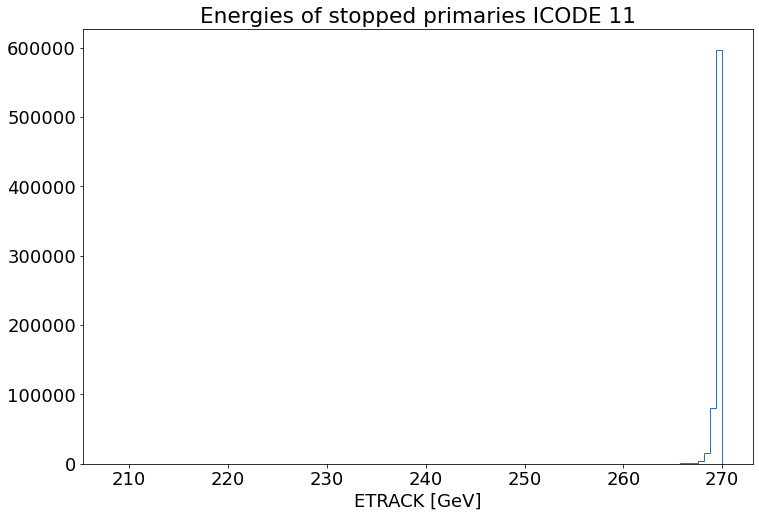

In [24]:
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(df_96.loc[df_96['ICODE']==11,'ETRACK'],bins=101,histtype='step');
plt.xlabel('ETRACK [GeV]')
plt.title('Energies of stopped primaries ICODE 11')

Text(0.5, 0, 'Turn #')

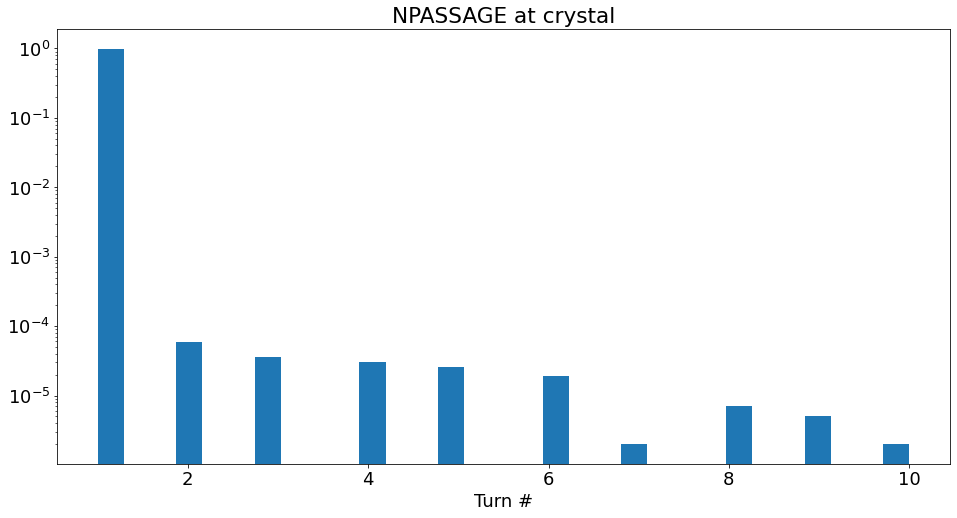

In [25]:
fig,ax=plt.subplots(figsize=(16,8))
#plt.hist(df_trj.loc[df_trj['LTRACK']==1,'NPASSAGE'],bins=21,log=True);
w = np.full((len(df_cry['NPASSAGE'])),1/1e6)

plt.hist(df_cry['NPASSAGE'],log=True,weights=w,bins=31);
plt.title('NPASSAGE at crystal')
plt.xlabel('Turn #')

In [26]:
np.sqrt(len(df_trj.loc[df_trj['LTRACK']==1,'Z'])), np.sqrt(len(df_98.loc[(df_98['ICODE']==101),'Z'])),np.sqrt(len(df_99.loc[df_99['ICODE']==101,'Z']))


np.ceil(np.log2(1300)) + 1



12.0

Number of NI in CRY: 1290

Number of NI in TACW0: 700517

Number of primaries in rest of aperture (excluding primaries reaching end of geo): 274540

Number of secondaries: 451

Number of primaries reaching end of geometry: 0


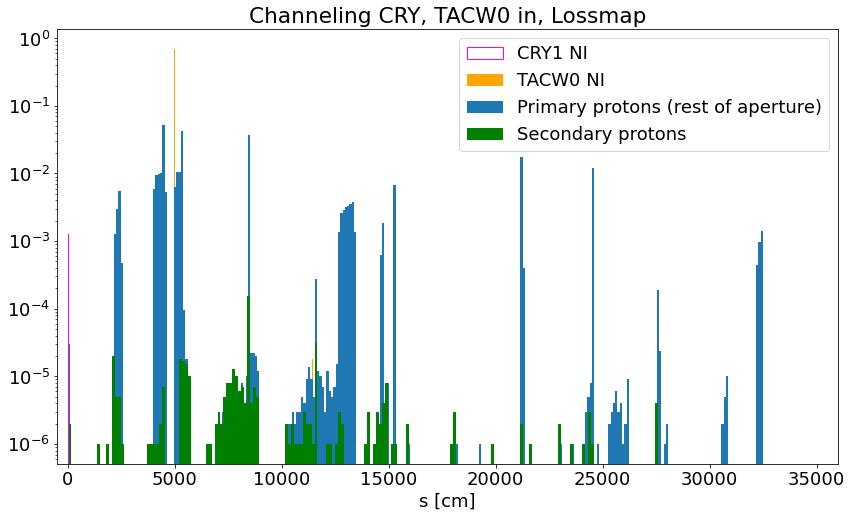

In [27]:
#TACW
fig2,ax=plt.subplots(figsize=(14,8))
#plt.hist(df_96.loc[df_96['ICODE']==11,'Z'],bins=201,label='Inelastic NI',color='magenta',log=True,histtype='bar',stacked=True);
#plt.hist(df_96.loc[df_96['ICODE']==12,'Z'],bins=1,color='red',log=True,histtype='step',stacked=True);

z1 = len(df_99.loc[df_99['ICODE']==101,'Z'])
w1 = np.full((z1),1/1e6)
plt.hist(df_99.loc[df_99['ICODE']==101,'Z'],bins=1,label='CRY1 NI',log=True,histtype='step',stacked=True,color='magenta',weights=w1);

z2 = len(df_98.loc[df_98['ICODE']==101,'Z'])
w2 = np.full((z2),1/1e6)
plt.hist(df_98.loc[(df_98['ICODE']==101),'Z'],bins=101,label='TACW0 NI',color='orange',log=True,histtype='bar',stacked=True,weights=w2);

z3 = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])
w3 = np.full((z3),1/1e6)
plt.hist(df_trj.loc[df_trj['LTRACK']==1,'Z'],bins=301,label='Primary protons (rest of aperture)',log=True,histtype='bar',stacked=True,weights=w3);


z4 = len(df_trj.loc[df_trj['LTRACK']==2,'Z'])
w4 = np.full((z4),1/1e6)
plt.hist(df_trj.loc[df_trj['LTRACK']==2,'Z'],bins=201,label='Secondary protons',color='green',log=True,histtype='bar',stacked=True,weights=w4);
#plt.hist(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'],bins=101,label='Gen. ≥ 3',color='red',log=True,histtype='bar',stacked=True);

#plt.hist(df_98.loc[(df_98['ICODE']==101) & (df_98['Z']>10000),'Z'],bins=1,label='TACW1 NI',color='black',log=True,histtype='bar',stacked=True);


plt.xlim(-500,36000)
plt.xlabel('s [cm]')
plt.title('Channeling CRY, TACW0 in, Lossmap')
plt.legend()

tot = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])+len(df_96.loc[df_96['ICODE']==11,'Z'])+len(df_96.loc[df_96['ICODE']==12,'Z'])
#print(f'USRMED primaries (1694), USRMED secondaries (520), fort.96 ICODE11 (998300), fort.96 ICODE12 (6)')
#print('\nUSRMED primaries + fort.96 ICODE11 + fort.96 ICODE12:', tot)


prim_rest_geo = len(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['Z']>33000),'Z'])
print('Number of NI in CRY:',z1)
print('\nNumber of NI in TACW0:',z2)
print('\nNumber of primaries in rest of aperture (excluding primaries reaching end of geo):',z3-prim_rest_geo)
print('\nNumber of secondaries:',z4)
print('\nNumber of primaries reaching end of geometry:',prim_rest_geo)




In [28]:
z1, z2

(1290, 700517)

Tungsten Absorber:

Number of NI in CRY: 1290

Number of NI in TACW0: 700517

Number of primaries in rest of aperture: 274540

Number of Gen ≥ 2 particles: 497

Number of primaries reaching end of geometry: 0


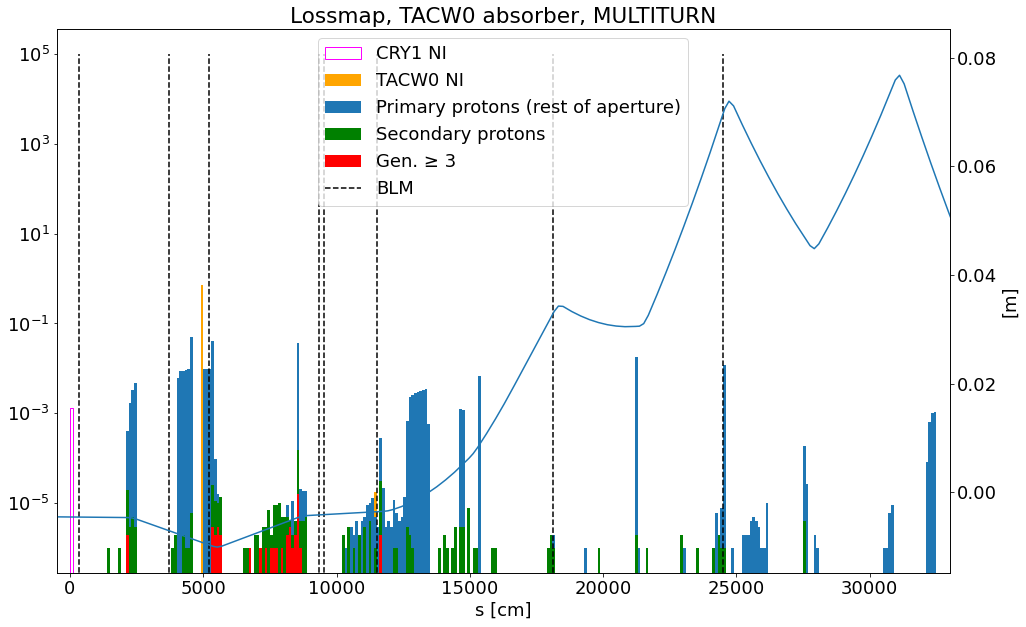

In [29]:
#TACW
fig2,ax_1=plt.subplots(figsize=(16,10))
S = data_frame['S']
DX = data_frame['DX']
ax_2 = ax_1.twinx() 
ax_2.plot((S-(5129.9275))*100,DX*0.01)
ax_2.set_ylabel('[m]')

#plt.hist(df_96.loc[df_96['ICODE']==11,'Z'],bins=201,label='Inelastic NI',color='magenta',log=True,histtype='bar',stacked=True);
#plt.hist(df_96.loc[df_96['ICODE']==12,'Z'],bins=1,color='red',log=True,histtype='step',stacked=True);

bins = np.linspace(0,35000,351)

z1 = len(df_99.loc[df_99['ICODE']==101,'Z'])
w1 = np.full((z1),1/1e6)

N, bins, _ = ax_1.hist(df_99.loc[df_99['ICODE']==101,'Z'],bins=bins,label='CRY1 NI',log=True,histtype='step',stacked=True,color='magenta',weights=w1);
#print(bins[1]-bins[0])
z2 = len(df_98.loc[df_98['ICODE']==101,'Z'])
w2 = np.full((z2),1/1e6)

N2, bins2, _ =ax_1.hist(df_98.loc[(df_98['ICODE']==101),'Z'],bins=bins,label='TACW0 NI',color='orange',log=True,histtype='bar',stacked=True,weights=w2);
#print(bins2[1]-bins2[0])
z3 = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])
w3 = np.full((z3),1/1e6)
ax_1.hist(df_trj.loc[df_trj['LTRACK']==1,'Z'],bins=bins,label='Primary protons (rest of aperture)',log=True,histtype='bar',stacked=True,weights=w3);


z4 = len(df_trj.loc[df_trj['LTRACK']==2,'Z'])
w4 = np.full((z4),1/1e6)
ax_1.hist(df_trj.loc[df_trj['LTRACK']==2,'Z'],bins=bins,label='Secondary protons',color='green',log=True,histtype='bar',stacked=True,weights=w4);

z5 = len(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'])
w5 = np.full((z5),1/1e6)
ax_1.hist(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'],bins=bins,label='Gen. ≥ 3',color='red',log=True,histtype='bar',stacked=True,weights=w5);

#plt.hist(df_98.loc[(df_98['ICODE']==101) & (df_98['Z']>10000),'Z'],bins=1,label='TACW1 NI',color='black',log=True,histtype='bar',stacked=True);
blms=np.asarray([340, 3720, 5210, 9345, 9540, 11500, 18120, 24492])
ax_1.vlines(blms,0,1e5, color='k',linestyles='dashed',label='BLM')

ax_1.set_xlim(-500,33000)
ax_1.set_xlabel('s [cm]')
ax_1.set_title('Lossmap, TACW0 absorber, MULTITURN')
ax_1.legend(loc='upper center')

tot = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])+len(df_96.loc[df_96['ICODE']==11,'Z'])+len(df_96.loc[df_96['ICODE']==12,'Z'])
#print(f'USRMED primaries (1694), USRMED secondaries (520), fort.96 ICODE11 (998300), fort.96 ICODE12 (6)')
#print('\nUSRMED primaries + fort.96 ICODE11 + fort.96 ICODE12:', tot)

print('Tungsten Absorber:\n')
print('Number of NI in CRY:',z1)
print('\nNumber of NI in TACW0:',z2)
print('\nNumber of primaries in rest of aperture:',z3-prim_rest_geo)
print('\nNumber of Gen ≥ 2 particles:',z4+z5)
print('\nNumber of primaries reaching end of geometry:',len(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['Z']>33000),'Z']))

Tungsten Absorber:

Number of NI in CRY: 1290

Number of NI in TACW0: 700517

Number of primaries in rest of aperture: 274540

Number of Gen ≥ 2 particles: 497

Number of primaries reaching end of geometry: 0


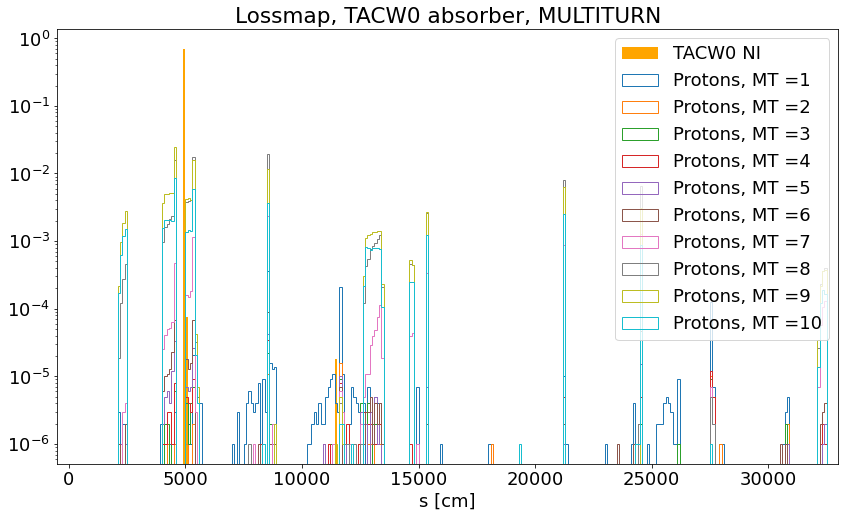

In [30]:
#TACW
fig2,ax=plt.subplots(figsize=(14,8))
#plt.hist(df_96.loc[df_96['ICODE']==11,'Z'],bins=201,label='Inelastic NI',color='magenta',log=True,histtype='bar',stacked=True);
#plt.hist(df_96.loc[df_96['ICODE']==12,'Z'],bins=1,color='red',log=True,histtype='step',stacked=True);

bins = np.linspace(0,35000,351)

z1 = len(df_99.loc[df_99['ICODE']==101,'Z'])
w1 = np.full((z1),1/1e6)

#N, bins, _ = plt.hist(df_99.loc[df_99['ICODE']==101,'Z'],bins=bins,label='CRY1 NI',log=True,histtype='step',stacked=True,color='magenta',weights=w1);
#print(bins[1]-bins[0])

z2 = len(df_98.loc[df_98['ICODE']==101,'Z'])
w2 = np.full((z2),1/1e6)
N2, bins2, _ =plt.hist(df_98.loc[(df_98['ICODE']==101),'Z'],bins=bins,label='TACW0 NI',color='orange',log=True,histtype='bar',stacked=True,weights=w2);

#print(bins2[1]-bins2[0])


z4 = len(df_trj.loc[df_trj['LTRACK']==2,'Z'])
w4 = np.full((z4),1/1e6)
#plt.hist(df_trj.loc[df_trj['LTRACK']==2,'Z'],bins=bins,label='Secondary protons',color='green',log=True,histtype='bar',stacked=True,weights=w4);

z5 = len(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'])
w5 = np.full((z5),1/1e6)
#plt.hist(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'],bins=bins,label='Gen. ≥ 3',color='red',log=True,histtype='bar',stacked=True,weights=w5);

#plt.hist(df_98.loc[(df_98['ICODE']==101) & (df_98['Z']>10000),'Z'],bins=1,label='TACW1 NI',color='black',log=True,histtype='bar',stacked=True);

#MULTITURN
z3 = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])
w3 = np.full((z3),1/1e6)
#plt.hist(df_trj.loc[df_trj['LTRACK']==1,'Z'],bins=bins,label='Protons, All',log=True,histtype='step',stacked=True,weights=w3);

z9 = len(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['NPASSAGE']==1),'Z'])
w9 = np.full((z9),1/1e6)
#plt.hist(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['NPASSAGE']==1),'Z'],bins=bins,label='Protons, MT = 1',log=True,histtype='step',stacked=True,weights=w9);

z6 = len(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['NPASSAGE']==2),'Z'])
w6 = np.full((z6),1/1e6)
#plt.hist(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['NPASSAGE']==2),'Z'],bins=bins,label='Protons, MT = 2',log=True,histtype='step',stacked=True,weights=w6);

z7 = len(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['NPASSAGE']==3),'Z'])
w7 = np.full((z7),1/1e6)
#plt.hist(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['NPASSAGE']==3),'Z'],bins=bins,label='Protons, MT = 3',log=True,histtype='step',stacked=True,weights=w7);

for i in range(1,11):
    z =len(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['NPASSAGE']==i),'Z'])
    w =np.full((z),1/1e6)
    plt.hist(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['NPASSAGE']==i),'Z'],bins=bins,label='Protons, MT ='+str(i),log=True,histtype='step',stacked=True,weights=w);

plt.xlim(-500,33000)
plt.xlabel('s [cm]')
plt.title('Lossmap, TACW0 absorber, MULTITURN')
plt.legend()

tot = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])+len(df_96.loc[df_96['ICODE']==11,'Z'])+len(df_96.loc[df_96['ICODE']==12,'Z'])
#print(f'USRMED primaries (1694), USRMED secondaries (520), fort.96 ICODE11 (998300), fort.96 ICODE12 (6)')
#print('\nUSRMED primaries + fort.96 ICODE11 + fort.96 ICODE12:', tot)

print('Tungsten Absorber:\n')
print('Number of NI in CRY:',z1)
print('\nNumber of NI in TACW0:',z2)
print('\nNumber of primaries in rest of aperture:',z3-prim_rest_geo)
print('\nNumber of Gen ≥ 2 particles:',z4+z5)
print('\nNumber of primaries reaching end of geometry:',len(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['Z']>33000),'Z']))

In [31]:
df_cry['NPASSAGE'].value_counts()

1     990323
2         59
3         36
4         30
5         26
6         19
8          7
9          5
10         2
7          2
Name: NPASSAGE, dtype: int64

Tungsten Absorber:

Number of NI in CRY: 1290

Number of NI in TACW0: 700517

Number of primaries in rest of aperture: 274540

Number of Gen ≥ 2 particles: 497

Number of primaries reaching end of geometry: 0


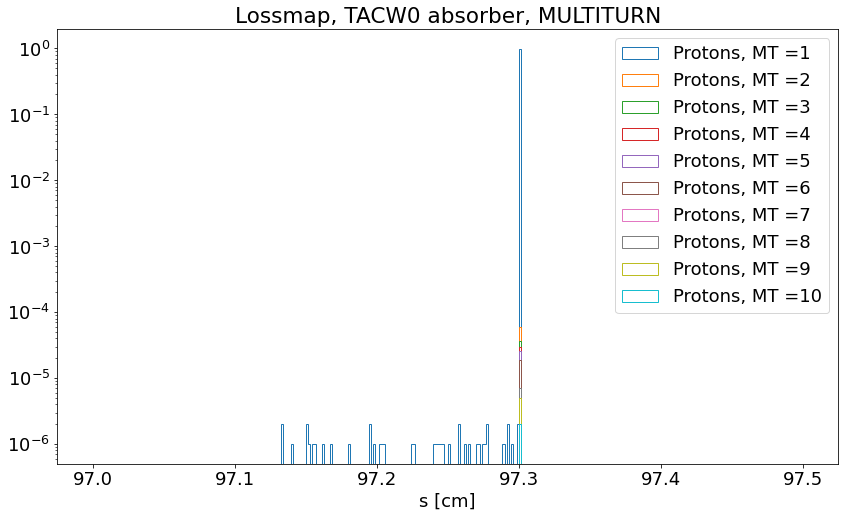

In [32]:
#TACW
fig2,ax=plt.subplots(figsize=(14,8))
#plt.hist(df_96.loc[df_96['ICODE']==11,'Z'],bins=201,label='Inelastic NI',color='magenta',log=True,histtype='bar',stacked=True);
#plt.hist(df_96.loc[df_96['ICODE']==12,'Z'],bins=1,color='red',log=True,histtype='step',stacked=True);

bins = np.linspace(97,97.5,351)

z1 = len(df_99.loc[df_99['ICODE']==101,'Z'])
w1 = np.full((z1),1/1e6)

#N, bins, _ = plt.hist(df_99.loc[df_99['ICODE']==101,'Z'],bins=bins,label='CRY1 NI',log=True,histtype='step',stacked=True,color='magenta',weights=w1);
#print(bins[1]-bins[0])



for i in range(1,11):
    z =len(df_cry.loc[df_cry['NPASSAGE']==i,'ZSCO'])
    w =np.full((z),1/1e6)
    plt.hist(df_cry.loc[df_cry['NPASSAGE']==i,'ZSCO'],bins=bins,label='Protons, MT ='+str(i),log=True,histtype='step',stacked=True,weights=w);

#plt.xlim(-500,3300)
plt.xlabel('s [cm]')
plt.title('Lossmap, TACW0 absorber, MULTITURN')
plt.legend()

tot = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])+len(df_96.loc[df_96['ICODE']==11,'Z'])+len(df_96.loc[df_96['ICODE']==12,'Z'])
#print(f'USRMED primaries (1694), USRMED secondaries (520), fort.96 ICODE11 (998300), fort.96 ICODE12 (6)')
#print('\nUSRMED primaries + fort.96 ICODE11 + fort.96 ICODE12:', tot)

print('Tungsten Absorber:\n')
print('Number of NI in CRY:',z1)
print('\nNumber of NI in TACW0:',z2)
print('\nNumber of primaries in rest of aperture:',z3-prim_rest_geo)
print('\nNumber of Gen ≥ 2 particles:',z4+z5)
print('\nNumber of primaries reaching end of geometry:',len(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['Z']>33000),'Z']))

In [33]:
df_cry.columns

Index(['JTRACK', 'X', 'Y', 'ZSCO', 'TXCRY', 'TYCRY', 'TZCRY', 'CXTRCK',
       'CYTRCK', 'INITX', 'KICK', 'PTOT', 'DELTEN', 'KCHNNL', 'ISTATE',
       'NPASSAGE', 'count'],
      dtype='object')

In [34]:
len(df_98.loc[(df_98['ICODE']==101) & (df_98['Z']<10000),'Z'])/201, len(df_trj.loc[df_trj['LTRACK']==1,'Z'])/101, len(df_trj.loc[df_trj['LTRACK']==2,'Z'])

(3485.0696517412935, 2718.2178217821784, 451)

In [35]:
df_99

ICODE  ICRYST  KCHNNL         Z      ANG0  ISTATE
IFILE NCASE                                                   
0     63       101       1      -1  0.082536 -0.000011       2
      215      101       1      -1  0.033947  0.000011       2
      1527     101       1      -1  0.039921 -0.000010       1
      2219     101       1      -1  0.105979 -0.000002       2
      2396     101       1      -1  0.174846  0.000004       2
...            ...     ...     ...       ...       ...     ...
99    8546     101       1      -1  0.174037 -0.000011       1
      8825     100       1      -1  0.040018  0.000011       1
      8929     100       1      -1  0.173770 -0.000010       1
      9745     101       1       2  0.011601  0.000003       3
      9863     100       1      -1  0.111191  0.000009       2

[1905 rows x 6 columns]

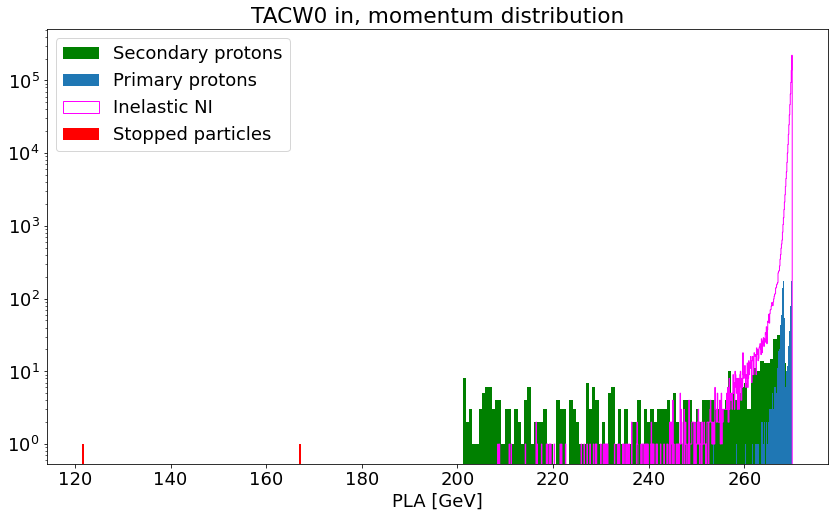

In [36]:
#TACW
fig,ax=plt.subplots(figsize=(14,8))
plt.hist(df_trj.loc[df_trj['LTRACK']==2,'PLA'],bins=101,label='Secondary protons',color='green',log=True,histtype='bar',stacked=True);
plt.hist(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['Z']<33000),'PLA'],bins=301,label='Primary protons',log=True,histtype='bar',stacked=True);

plt.hist(df_96.loc[df_96['ICODE']==11,'ETRACK'],bins=601,label='Inelastic NI',color='magenta',log=True,histtype='step',stacked=True);
plt.hist(df_96.loc[df_96['ICODE']==12,'ETRACK'],bins=101,label='Stopped particles',color='red',log=True,histtype='bar',stacked=True);

#plt.xlim(-500,28600)
plt.xlabel('PLA [GeV]')
plt.title('TACW0 in, momentum distribution')
plt.legend()

In [37]:
df_trj

IJ  IONZ  IONA         PLA           X         Y             Z  \
IFILE NCASE                                                                   
0     6       1     1     1  269.999430    7.535134  0.280926   5358.140000   
      9       1     1     1  269.999187    7.798975  0.126433   5052.060203   
      10      1     1     1  269.999371    7.326085  0.476410   5358.140000   
      12      1     1     1  269.999233    7.766085 -0.726579   4058.127095   
      28      1     1     1  269.999415  -42.452995  2.425000  14695.461960   
...          ..   ...   ...         ...         ...       ...           ...   
99    9989    1     1     1  269.999448    7.281600 -0.564446   4522.840000   
      9991    1     1     1  269.999487    7.033248 -0.865002   4522.840000   
      9995    1     1     1  269.999298    7.758403  0.804473   5039.811145   
      9997    1     1     1  269.999086    7.158209  0.372258   4522.840000   
      10000   1     1     1  269.999384 -404.475230 -1.488417  21240.904607   

                  TXX       TYY       TZZ  WEIGHT  LLOUSE  ISAMPLE  NEWREG  \
IFILE NCASE                                                                  
0     6      0.001705 -0.000178  0.999999     1.0       1        0      27   
      9      0.001898 -0.000067  0.999998     1.0       1        0     473   
      10     0.001658 -0.000298  0.999999     1.0       1        0      27   
      12     0.002496  0.000250  0.999997     1.0       1        0     473   
      28    -0.033685  0.000559  0.999432     1.0       1        0     164   
...               ...       ...       ...     ...     ...      ...     ...   
99    9989   0.002034  0.000232  0.999998     1.0       1        0     453   
      9991   0.001965  0.000356  0.999998     1.0       1        0     453   
      9995   0.001894 -0.000421  0.999998     1.0       1        0     473   
      9997   0.001999 -0.000153  0.999998     1.0       1        0     453   
      10000 -0.084503 -0.000126  0.996423     1.0       1        0      97   

             NPASSAGE  LTRACK         ZLAST  count  
IFILE NCASE                                         
0     6             9       1   5358.140000      1  
      9             8       1   5052.060203      1  
      10            8       1   5358.140000      1  
      12           10       1   4058.127095      1  
      28            8       1  14695.461960      1  
...               ...     ...           ...    ...  
99    9989          9       1   4522.840000      1  
      9991          8       1   4522.840000      1  
      9995          9       1   5039.811145      1  
      9997          9       1   4522.840000      1  
      10000         8       1  21240.904607      1  

[275037 rows x 18 columns]

In [38]:
df_trj['LTRACK'].value_counts()

1    274540
2       451
3        37
4         8
5         1
Name: LTRACK, dtype: int64

Text(0.5, 1.0, 'TACW0 in, momentum vs z for all particles in aperture')

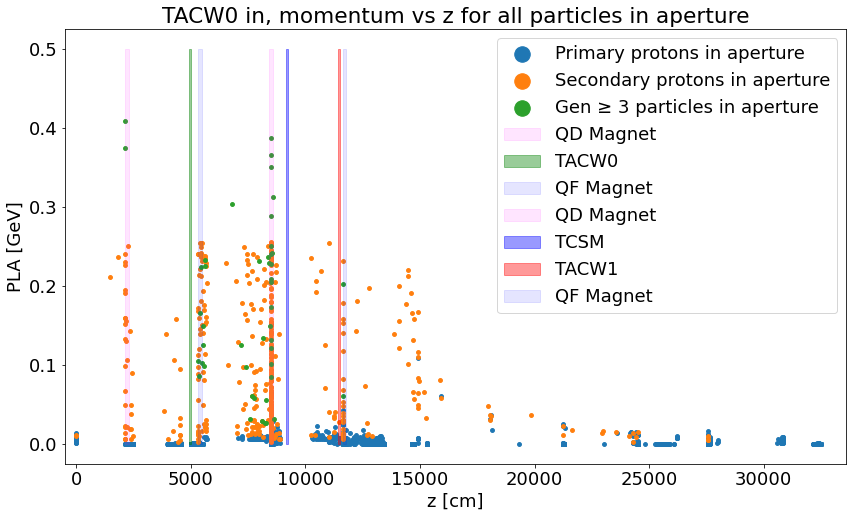

In [39]:
fig,ax=plt.subplots(figsize=(14,8))
plt.scatter(df_trj.loc[df_trj['LTRACK']==1,'Z'],1-df_trj.loc[df_trj['LTRACK']==1,'PLA']/270,s=15,label='Primary protons in aperture')
plt.scatter(df_trj.loc[df_trj['LTRACK']==2,'Z'],1-df_trj.loc[df_trj['LTRACK']==2,'PLA']/270,s=15,label='Secondary protons in aperture')
plt.scatter(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'],1-df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'PLA']/270,s=15,label='Gen ≥ 3 particles in aperture')


plt.fill_between([2100,2300], [0],[0.5], color='magenta', alpha=0.1,label='QD Magnet')
plt.fill_between([4930,5010], [0],[0.5], color='green', alpha=0.4,label='TACW0')
plt.fill_between([5300,5500], [0],[0.5], color='blue', alpha=0.1,label='QF Magnet')
plt.fill_between([8400,8600], [0],[0.5], color='magenta', alpha=0.1,label='QD Magnet')
plt.fill_between([9150,9225], [0],[0.5], color='blue', alpha=0.4,label='TCSM')
plt.fill_between([11400,11485], [0],[0.5], color='red', alpha=0.4,label='TACW1')
plt.fill_between([11650,11750], [0],[0.5], color='blue', alpha=0.1,label='QF Magnet')


#plt.fill_between([11700,15000], [270],[130], color='red', alpha=0.15,label='Start of bend (QF)')


plt.xlim(-500,33600)
plt.ylabel('PLA [GeV]')
plt.xlabel('z [cm]')
plt.legend(scatterpoints=1,markerscale=4,loc='upper right')

plt.title('TACW0 in, momentum vs z for all particles in aperture')

(11000.0, 12000.0)

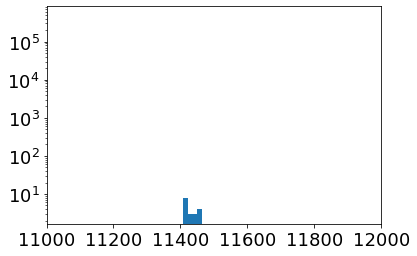

In [40]:
fig,ax = plt.subplots()
plt.hist(df_96.loc[(df_96['ICODE']==11),'Z'],bins=801,log=True);
plt.xlim(11000,12000)

In [41]:
merge_42 = pd.merge(df_cry, df_42,left_index=True, right_index=True,how='right', suffixes=('_cry','_tacw'))
print(len(merge_42), len(df_42))
merge_42.columns

702324 702278


Index(['JTRACK_cry', 'X', 'Y', 'ZSCO_cry', 'TXCRY', 'TYCRY', 'TZCRY',
       'CXTRCK_cry', 'CYTRCK_cry', 'INITX', 'KICK', 'PTOT_cry', 'DELTEN',
       'KCHNNL', 'ISTATE', 'NPASSAGE_cry', 'count_cry', 'JTRACK_tacw', 'IZ',
       'IA', 'XSCO', 'YSCO', 'ZSCO_tacw', 'CXTRCK_tacw', 'CYTRCK_tacw',
       'PTOT_tacw', 'LTRACK', 'NPASSAGE_tacw', 'count_tacw'],
      dtype='object')

/var/folders/kc/46w6mj1x0h3807l6v8vm8z_c0000gn/T/ipykernel_86586/2464143757.py:9: RuntimeWarning: invalid value encountered in true_divide
  ratio  = np.divide(hist_ch.T, hist.T)
/var/folders/kc/46w6mj1x0h3807l6v8vm8z_c0000gn/T/ipykernel_86586/2464143757.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(mappable=mesh)


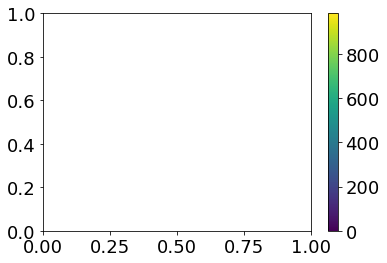

In [42]:
binx = np.linspace(min(df_42['XSCO']),max(df_42['XSCO']),60)
biny = np.linspace(min(merge_42.loc[merge_42['ISTATE']==2,'XSCO']),max(merge_42.loc[merge_42['ISTATE']==2,'XSCO']),60)


hist,_,_ = np.histogram2d(df_42['XSCO'].values,df_42['XSCO'].values,bins=(binx,binx),);
hist_ch,_,_ = np.histogram2d(merge_42.loc[merge_42['ISTATE']==2,'XSCO'].values,merge_42.loc[merge_42['ISTATE']==2,'XSCO'].values,bins=(biny,biny),);


ratio  = np.divide(hist_ch.T, hist.T)

X, Y = np.meshgrid(binx,biny)
mesh = ax.pcolormesh(X, Y, (ratio))

cbar = plt.colorbar(mappable=mesh) 

(-0.2, 0.2)

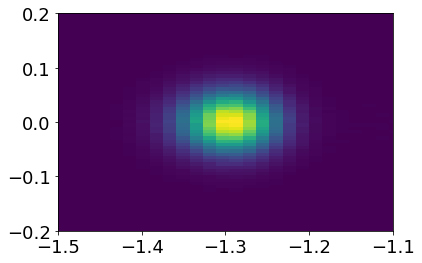

In [43]:
plt.hist2d(df_42['XSCO'],df_42['YSCO'],bins=901);
plt.xlim(-1.5,-1.1)
plt.ylim(-0.2,0.2)

Text(0.5, 1.0, 'Impact distribution TCSM')

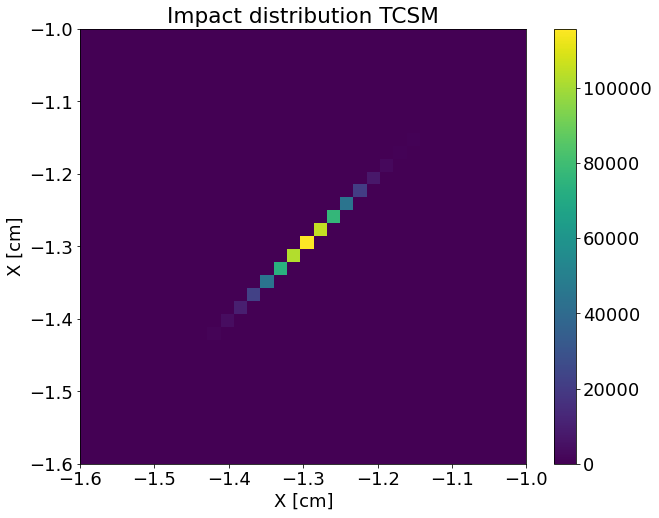

In [44]:
#For TCSM
fig,ax=plt.subplots(figsize=(10,8))
plt.hist2d(df_42['XSCO'],df_42['XSCO'],bins=801, cmap=plt.cm.viridis);
plt.colorbar()
#plt.pcolormesh((df_40['XSCO'],df_40['XSCO']))
#mesh = ax.pcolormesh(X, Y, (ratio))


plt.xlim(-1.6,-1)
plt.ylim(-1.6,-1)
plt.xlabel('X [cm]')
plt.ylabel('X [cm]')
plt.title('Impact distribution TCSM')

Text(0.5, 1.0, 'Impact distribution X TACW0')

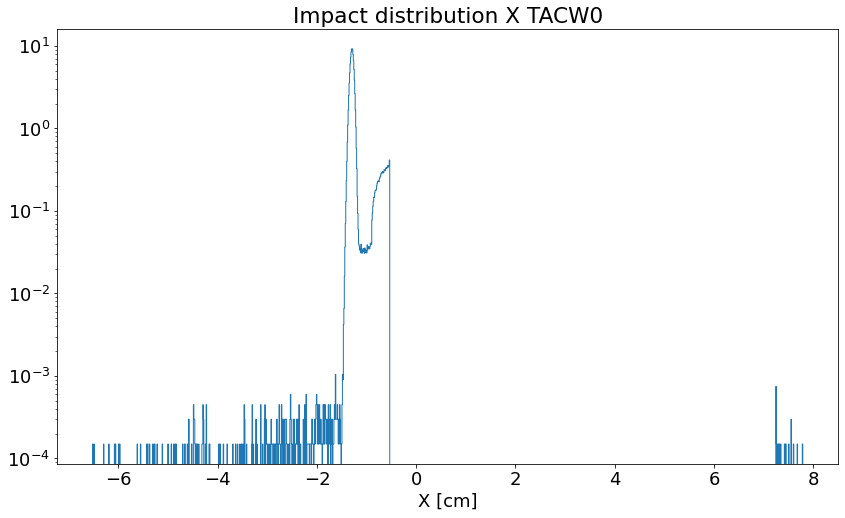

In [45]:
fig,ax=plt.subplots(figsize=(14,8))
plt.hist(df_42['XSCO'],bins=1501,histtype='step',density=True,log=True);
#plt.xlim(-1,-0.6)

plt.xlabel('X [cm]')
plt.title('Impact distribution X TACW0')

In [46]:
#Change binnings so the same binsize. Means amount of bins the same relative to population of each ISTATE. 
merge_42['ISTATE'].value_counts()

 3.0    628378
 2.0     66288
 1.0      3630
 5.0      1892
 0.0       444
-1.0       310
 4.0       108
Name: ISTATE, dtype: int64

In [47]:
len(merge_42.loc[merge_42['ISTATE']==3])/4001, len(merge_42.loc[merge_42['ISTATE']==2])/147, 385/21

(157.05523619095226, 450.9387755102041, 18.333333333333332)

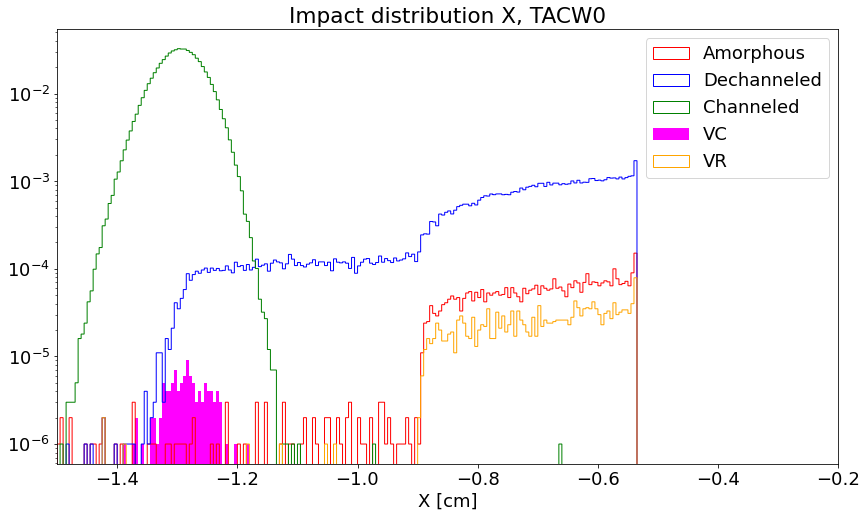

In [48]:
fig,ax =plt.subplots(figsize=(14,8))
impact_bins = np.linspace(-2,1,601)

z1 = len(merge_42.loc[(merge_42['ISTATE']==-1) | (merge_42['ISTATE']==0) | (merge_42['ISTATE']==1),'XSCO'])
w1 = np.full((z1),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==-1) | (merge_42['ISTATE']==0) | (merge_42['ISTATE']==1),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='red',label='Amorphous',weights=w1);

z2 = len(merge_42.loc[(merge_42['ISTATE']==2),'XSCO'])
w2 = np.full((z2),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==2),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='blue',label='Dechanneled',weights=w2);

z3 = len(merge_42.loc[(merge_42['ISTATE']==3),'XSCO'])
w3 = np.full((z3),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==3),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='green',label='Channeled',weights=w3);

z4 = len(merge_42.loc[(merge_42['ISTATE']==4),'XSCO'])
w4 = np.full((z4),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==4),'XSCO'],bins=impact_bins,histtype='bar',stacked=True,log=True,color='magenta',label='VC',weights=w4);

z5 = len(merge_42.loc[(merge_42['ISTATE']==5),'XSCO'])
w5 = np.full((z5),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==5),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='orange',label='VR',weights=w5);

plt.xlim(-1.5,-0.2)

plt.xlabel('X [cm]')
plt.title('Impact distribution X, TACW0')
plt.legend();

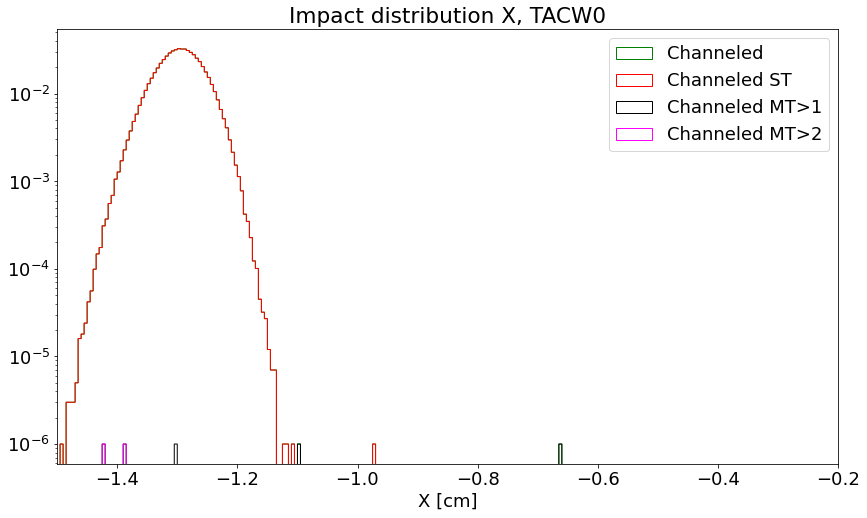

In [49]:
fig,ax =plt.subplots(figsize=(14,8))
impact_bins = np.linspace(-2,1,601)

z1 = len(merge_42.loc[(merge_42['ISTATE']==-1) | (merge_42['ISTATE']==0) | (merge_42['ISTATE']==1),'XSCO'])
w1 = np.full((z1),1/1e6)
#plt.hist(merge_42.loc[(merge_42['ISTATE']==-1) | (merge_42['ISTATE']==0) | (merge_42['ISTATE']==1),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='red',label='Amorphous',weights=w1);

z2 = len(merge_42.loc[(merge_42['ISTATE']==2),'XSCO'])
w2 = np.full((z2),1/1e6)
#plt.hist(merge_42.loc[(merge_42['ISTATE']==2),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='blue',label='Dechanneled',weights=w2);

z3 = len(merge_42.loc[(merge_42['ISTATE']==3),'XSCO'])
w3 = np.full((z3),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==3),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='green',label='Channeled',weights=w3);

z4 = len(merge_42.loc[(merge_42['ISTATE']==4),'XSCO'])
w4 = np.full((z4),1/1e6)
#plt.hist(merge_42.loc[(merge_42['ISTATE']==4),'XSCO'],bins=impact_bins,histtype='bar',stacked=True,log=True,color='magenta',label='VC',weights=w4);

z5 = len(merge_42.loc[(merge_42['ISTATE']==5),'XSCO'])
w5 = np.full((z5),1/1e6)
#plt.hist(merge_42.loc[(merge_42['ISTATE']==5),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='orange',label='VR',weights=w5);


z8 = len(merge_42.loc[(merge_42['ISTATE']==3) & (merge_42['NPASSAGE_tacw']==1),'XSCO'])
w8 = np.full((z8),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==3) & (merge_42['NPASSAGE_tacw']==1),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='red',label='Channeled ST',weights=w8);

#MULTITURN
z6 = len(merge_42.loc[(merge_42['ISTATE']==3) & (merge_42['NPASSAGE_tacw']>1),'XSCO'])
w6 = np.full((z6),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==3) & (merge_42['NPASSAGE_tacw']>1),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='k',label='Channeled MT>1',weights=w6);

z7 = len(merge_42.loc[(merge_42['ISTATE']==3) & (merge_42['NPASSAGE_tacw']>2),'XSCO'])
w7 = np.full((z7),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==3) & (merge_42['NPASSAGE_tacw']>2),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='magenta',label='Channeled MT>2',weights=w7);


plt.xlim(-1.5,-0.2)

plt.xlabel('X [cm]')
plt.title('Impact distribution X, TACW0')
plt.legend();

In [50]:
merge_42.columns

Index(['JTRACK_cry', 'X', 'Y', 'ZSCO_cry', 'TXCRY', 'TYCRY', 'TZCRY',
       'CXTRCK_cry', 'CYTRCK_cry', 'INITX', 'KICK', 'PTOT_cry', 'DELTEN',
       'KCHNNL', 'ISTATE', 'NPASSAGE_cry', 'count_cry', 'JTRACK_tacw', 'IZ',
       'IA', 'XSCO', 'YSCO', 'ZSCO_tacw', 'CXTRCK_tacw', 'CYTRCK_tacw',
       'PTOT_tacw', 'LTRACK', 'NPASSAGE_tacw', 'count_tacw'],
      dtype='object')

In [51]:
merge_42['ISTATE'].value_counts()

 3.0    628378
 2.0     66288
 1.0      3630
 5.0      1892
 0.0       444
-1.0       310
 4.0       108
Name: ISTATE, dtype: int64

In [52]:
[len(merge_42.loc[merge_42['ISTATE']==i])/len(merge_42['ISTATE'])*100 for i in range(-1,6)]

[0.044139172233897746,
 0.06321868539306644,
 0.5168554684162865,
 9.438378867872947,
 89.47124119352323,
 0.015377518068583732,
 0.2693913350533372]

In [53]:
0.04373312054996317+0.001994844095261478+0.01335011048367297

0.059078075128897616

In [54]:
#The particles with X > 0 are hitting the TACW1

Text(0.5, 1.0, 'Impact distribution X TACW0')

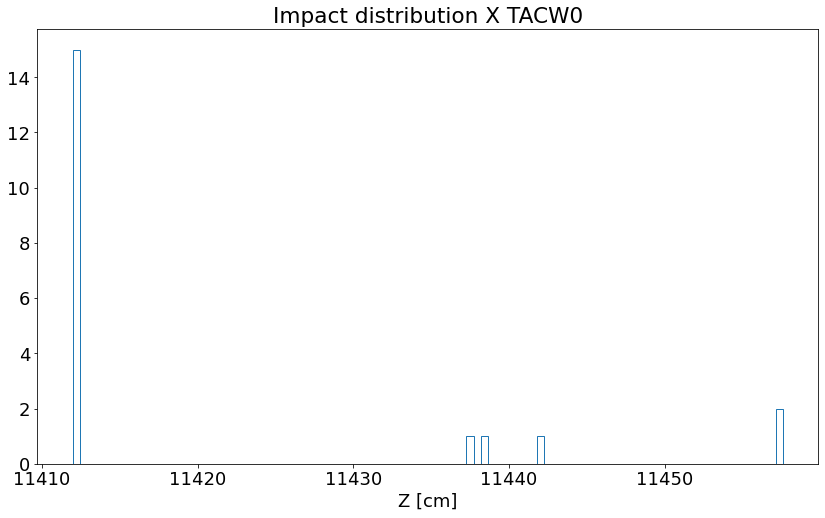

In [55]:
fig,ax =plt.subplots(figsize=(14,8))

plt.hist(merge_42.loc[merge_42['XSCO']>0,'ZSCO_tacw'],bins=101,histtype='step',stacked=True,label=1);

plt.xlabel('Z [cm]')
plt.title('Impact distribution X TACW0')



In [56]:
merge_42.loc[merge_42['XSCO']>0]

,,JTRACK_cry,X,Y,ZSCO_cry,TXCRY,TYCRY,TZCRY,CXTRCK_cry,CYTRCK_cry,INITX,...,IA,XSCO,YSCO,ZSCO_tacw,CXTRCK_tacw,CYTRCK_tacw,PTOT_tacw,LTRACK,NPASSAGE_tacw,count_tacw
IFILE,NCASE,,,,,,,,,,,,,,,,,,,,,
5,1293,1.0,-0.258222,0.039456,97.300000,0.000049,0.000019,1.0,0.000041,0.000021,-2.866259e-06,...,1,7.598833,-1.248520,11411.975,0.001876,0.000057,268.29892,1,7,2
7,7243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,7.449132,-0.515646,11411.975,0.001809,0.000051,262.72642,2,5,2
10,4758,1.0,-0.252767,-0.016532,97.300004,0.000053,0.000008,1.0,-0.000121,0.000008,7.904673e-07,...,1,7.509955,1.133255,11411.975,0.001908,-0.000121,268.10998,1,1,2
11,2090,1.0,-0.253449,0.000430,97.300003,0.000055,0.000015,1.0,-0.000115,0.000015,3.168088e-06,...,1,7.256184,-2.016204,11411.975,0.001864,0.000239,257.71508,2,1,2
14,7305,1.0,-0.268060,-0.067531,97.300003,0.000054,-0.000023,1.0,-0.000107,-0.000023,2.374834e-06,...,1,7.559376,-0.291177,11411.975,0.001915,0.000047,267.73980,1,1,2
15,7853,1.0,-0.252232,-0.042600,97.300000,0.000056,-0.000022,1.0,0.000009,-0.000030,4.316800e-06,...,1,7.281267,0.440219,11411.975,0.001757,-0.000024,269.70582,1,2,2
26,9716,1.0,-0.262991,0.015966,97.300001,0.000042,0.000001,1.0,-0.000004,0.000008,-1.006119e-05,...,1,7.421566,2.058038,11411.975,0.001790,-0.000212,269.52498,1,1,2
28,2224,1.0,-0.252717,0.024588,97.300002,0.000044,0.000012,1.0,-0.000113,0.000012,-7.866156e-06,...,1,7.284108,0.201827,11411.975,0.001850,-0.000034,268.32959,1,1,2
43,282,1.0,-0.252327,-0.034976,97.300001,0.000046,-0.000018,1.0,-0.000115,-0.000018,-5.328140e-06,...,1,7.345631,-0.518637,11411.975,0.001869,0.000065,267.33440,1,1,2


In [57]:
merge_42.columns

Index(['JTRACK_cry', 'X', 'Y', 'ZSCO_cry', 'TXCRY', 'TYCRY', 'TZCRY',
       'CXTRCK_cry', 'CYTRCK_cry', 'INITX', 'KICK', 'PTOT_cry', 'DELTEN',
       'KCHNNL', 'ISTATE', 'NPASSAGE_cry', 'count_cry', 'JTRACK_tacw', 'IZ',
       'IA', 'XSCO', 'YSCO', 'ZSCO_tacw', 'CXTRCK_tacw', 'CYTRCK_tacw',
       'PTOT_tacw', 'LTRACK', 'NPASSAGE_tacw', 'count_tacw'],
      dtype='object')

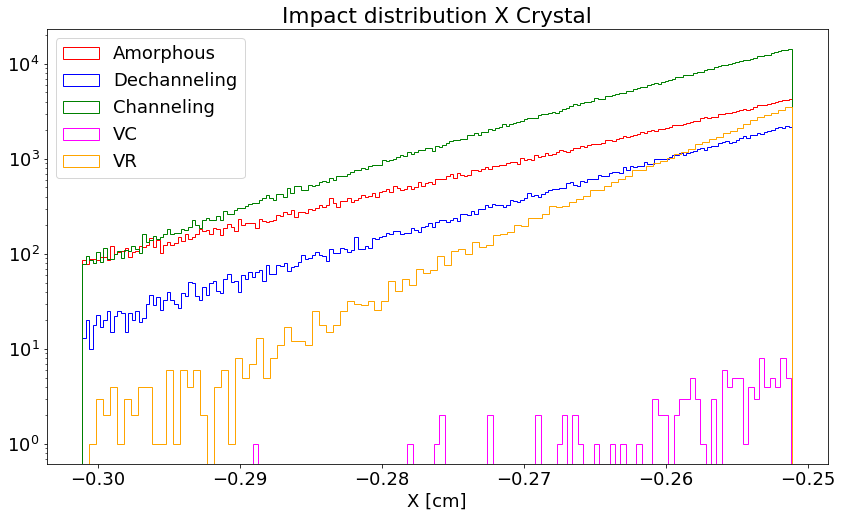

In [58]:
fig,ax =plt.subplots(figsize=(14,8))
#for i in range(-1,5):
 #   plt.hist(df_cry.loc[df_cry['ISTATE']==i,'X'],bins=201,histtype='step',stacked=True,log=True,label=i);
    
plt.hist(df_cry.loc[(df_cry['ISTATE']==-1) | (df_cry['ISTATE']==0) | (df_cry['ISTATE']==1),'X'],bins=201,histtype='step',stacked=True,log=True,color='red',label='Amorphous')
plt.hist(df_cry.loc[df_cry['ISTATE']==2,'X'],bins=201,histtype='step',stacked=True,log=True,color='blue',label='Dechanneling')
plt.hist(df_cry.loc[df_cry['ISTATE']==3,'X'],bins=201,histtype='step',stacked=True,log=True,color='green',label='Channeling')
plt.hist(df_cry.loc[df_cry['ISTATE']==4,'X'],bins=101,histtype='step',stacked=True,log=True,color='magenta',label='VC')
plt.hist(df_cry.loc[df_cry['ISTATE']==5,'X'],bins=101,histtype='step',stacked=True,log=True,color='orange',label='VR')



plt.xlabel('X [cm]')
plt.title('Impact distribution X Crystal')
plt.legend(loc='upper left');

In [59]:
df_cry['ISTATE'].value_counts()

 3    628306
 1    163302
 2     96899
 0     51120
 5     50038
-1       736
 4       108
Name: ISTATE, dtype: int64

In [60]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

(-15.0, 15.0)

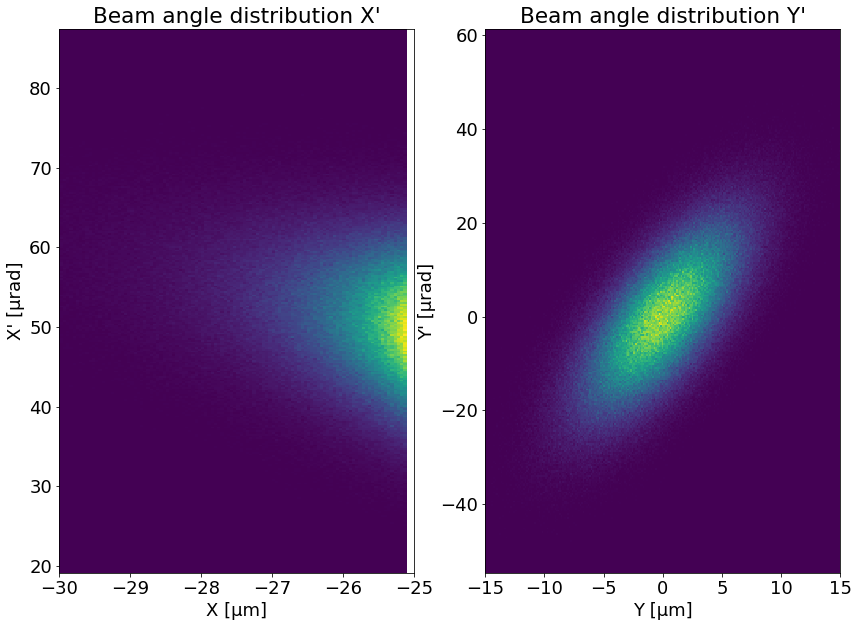

In [61]:
#in microns
fig,ax=plt.subplots(1,2,figsize=(14,10))
ax[0].hist2d(df_rea['XX']*10000,df_rea['XP']*1e6,bins=301);
ax[0].set_xlabel('X [µm]')
ax[0].set_ylabel('X\' [µrad]')
ax[0].set_title('Beam angle distribution X\'')
ax[0].set_xlim(-30,-25)

ax[1].hist2d(df_rea['YY']*10000,df_rea['YP']*1e6,bins=301);
ax[1].set_xlabel('Y [µm]')
ax[1].set_ylabel('Y\' [µrad]')
ax[1].set_title('Beam angle distribution Y\'')

plt.xlim(-15,15)

(-15.0, 15.0)

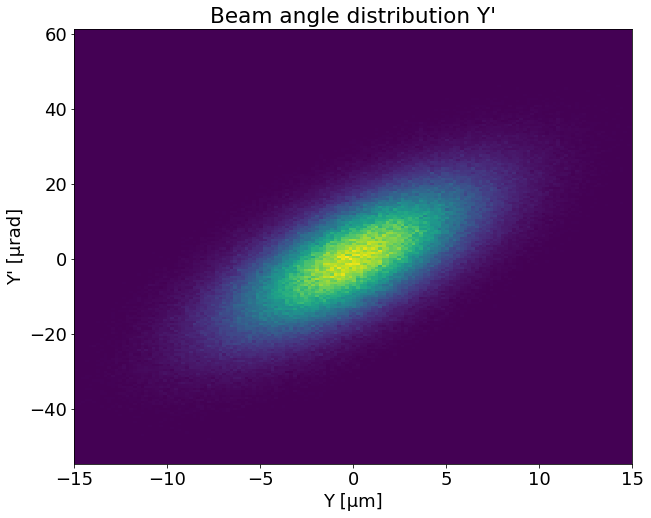

In [62]:
#in microns
fig,ax=plt.subplots(figsize=(10,8))
plt.hist2d(df_rea['YY']*10000,df_rea['YP']*1e6,bins=201);
plt.xlabel('Y [µm]')
plt.ylabel('Y\' [µrad]')
plt.title('Beam angle distribution Y\'')

plt.xlim(-15,15)